# Create Watershed Masks for MACA data

The purpose of this notebook is to create a single NetCDF file containing masks for four subwatersheds of the Lake Coeur d'Alene basin and another mask for the entirety of the watershed. The masks are rasters with a 0.0625${}^{\circ}$ square resolution that coincide with MACA data downloaded by Alejandro N. Flores to analyze future climate scenarios of precipitation and temperature in the Lake Coeur d'Alene watershed in support of a National Academies of Science, Engineering, and Medicine consensus committee report on the _Future of Water Quality in Lake Coeur d'Alene_.

Masks were previously generated by clipping a sample grid from the downloaded MACA data to a KML file for each of the subwatersheds in QGIS. The masks consist of a grid that is 76 rows by 85 columns on a rectalinear grid. Within the mask grids, where the majority of a grid cell falls within the KML file for the subwatersheds, the value of the grid is 1. Elsewhere the value is a NaN. This allows for element-by-element multiplication of the MACA data with these masks grids in ways that will isolate climate variables to the confines of each individual subwatershed and the whole Lake Coeur d'Alene watershed.  

Subwatersheds for which masks were generated are the following USGS 8 Digit Hydrologic Unit Code (HUC) basins: 

1. 17010303: Coeur d'Alene Lake, Idaho and Washington. Area = 663 mi${}^2$.
2. 17010301: Upper Coeur d'Alene River, Idaho. Area = 905 mi${}^2$.
3. 17010302: South Fork Coeur d'Alene River, Idaho. Area = 297 mi${}^2$.
4. 17010304: St. Joe River, Idaho. Area = 1860 mi${}^2$.

## 1. Import required libraries and set file names to open

In [1]:
import xarray as xr
import numpy as np

f_CDA_basin_ws = 'MACA_mask_IntegratedCdA_watershed.nc'
f_CDA_lkCDA_ws = 'MACA_mask_LakeCdA_watershed.nc'
f_CDA_sfCDA_ws = 'MACA_mask_SForkCdA_watershed.nc'
f_CDA_stJOE_ws = 'MACA_mask_StJoeRiver_watershed.nc'
f_CDA_upCDA_ws = 'MACA_mask_UpperCdA_watershed.nc'

## 2. Open NetCDF files using `xArray`

In [2]:
# Open NetCDF masks as xArray datasets

ds_basin_ws = xr.open_dataset(f_CDA_basin_ws)
ds_lkCDA_ws = xr.open_dataset(f_CDA_lkCDA_ws)
ds_sfCDA_ws = xr.open_dataset(f_CDA_sfCDA_ws)
ds_stJOE_ws = xr.open_dataset(f_CDA_stJOE_ws)
ds_upCDA_ws = xr.open_dataset(f_CDA_upCDA_ws)

## 3. Create a Combined `xArray` Dataset from each of the individual datasets

In [3]:
ds_all_masks = xr.Dataset(
        data_vars=dict(
            CDA_basin=(['lat','lon'], ds_basin_ws['Band1'].values),
            CDA_lkCDA=(['lat','lon'], ds_lkCDA_ws['Band1'].values),
            CDA_sfCDA=(['lat','lon'], ds_sfCDA_ws['Band1'].values),
            CDA_stJOE=(['lat','lon'], ds_stJOE_ws['Band1'].values),
            CDA_upCDA=(['lat','lon'], ds_upCDA_ws['Band1'].values),
            ),
        coords=dict(
            lon=(['lon'], ds_basin_ws.lon.values),
            lat=(['lat'], ds_basin_ws.lat.values),
        ),
        attrs=dict(Conventions=ds_basin_ws.attrs.get('Conventions'),),
    )

ds_all_masks.lat.attrs = ds_basin_ws.lat.attrs
ds_all_masks.lon.attrs = ds_basin_ws.lon.attrs

ds_all_masks

<xarray.Dataset>
Dimensions:    (lat: 75, lon: 86)
Coordinates:
  * lon        (lon) float64 -118.2 -118.2 -118.1 ... -113.0 -113.0 -112.9
  * lat        (lat) float64 44.78 44.84 44.91 44.97 ... 49.22 49.28 49.34 49.41
Data variables:
    CDA_basin  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    CDA_lkCDA  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    CDA_sfCDA  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    CDA_stJOE  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    CDA_upCDA  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Conventions:  CF-1.5

## 4. Plot the mask for an individual watershed to verify 

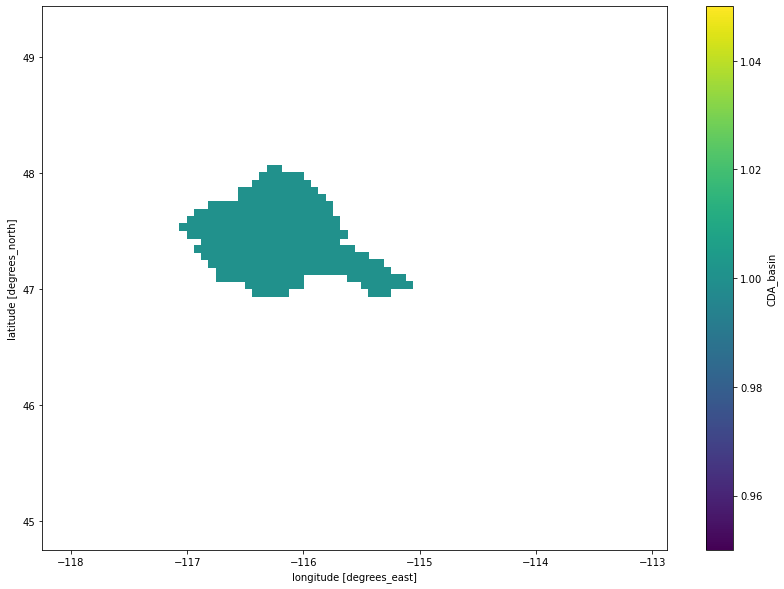

In [4]:
ds_all_masks['CDA_basin'].plot(figsize=(14,10))

## 5. Save the combined dataset to a NetCDF file for subsequent use

In [5]:
ds_all_masks.to_netcdf('CDA_MACA_masks_combined.nc')